In [1]:
import pandas as pd
import requests
import json
from PIL import Image
from io import BytesIO

#import requests
#import json
#response = requests.get("https://api.smk.dk/api/v1/")
#response.status_code

Would not use the api

In [4]:
df_json = pd.read_json('../smk_all_artworks.json')
df_csv = pd.read_csv('../smk_all_artworks.csv')
df_all = pd.read_csv('../smk_all.csv')

/Users/larispardo/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,37,48,49,86,88,89,106) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_json.shape, df_csv.shape, df_all.shape

((79004, 53), (79004, 33), (84671, 115))

In [6]:
df_csv = df_csv[df_csv.image_iiif_info.notnull() & df_csv.public_domain ]
df_json = df_json[df_json.image_iiif_info.notnull() & df_json.public_domain ]

In [7]:
df_json.shape, df_csv.shape

((22397, 53), (22397, 33))

warning columns (all dataset):
1. acq_reason :: coment on art work, not many full (54 of 84k)
2. dimention_weight :: coments on weight? many repeated only 23 of 84k
3. inscription_stoebemaerke :: "for nylig!" 21 of 84k
4. inscription_stoebenummer :: " mange √•r senere" (same pictures as the ones from inscription_stoebemaerke.
5. other_numbers_beckett :: random numbers sometimes with letters on the end " ville v√¶re i stand til i h√∏jere grad at dechifrere denne samling rekvisitter" (1.6k of 84k)
6. other_numbers_gernsheim :: random numbers sometimes with letters. " da lignende genstande havde vist sig i bygden s√• mange √•r tilbage.;--;KMS8553/8;--;sibling;-;Syv fors√∏g p√• at skabe passende apparatur til almindelige familier. Fors√∏g nr. 1. For mange √•r siden dukkede der pludselig en dag disse groft udformede tingester med bandagelignende komponenter op i bygden. De l√¶nede sig op ad en husgavl her og der!" (2k of 84k)
7. other_numbers_sidetal :: numbers sometimes words, most common: " og med deres indbundne elementer" (1k out of 84k)
8. techniquearticle :: diferent phrases (30 of 84k)

recommended actions, do not care and delete this columns from final data frame.

object type and type main seem to be the same thing.

1. has image = medium_image_url (44k out of 84k)
2. image_native or iiif (does not exist in the current dataset).
3. Public domain = copyright, none are labeled as public domain, but 55k have nothing written on them. (31 k blank and url)
4. object_names = object_type_en and object_type_main_en (seem to be always the same)
5. production_date = object_production_date_text_en seem to be very inconsistent on how they save dates.

Reproduction variable is null everywhere.


In [8]:
#df['has_image']
#df.columns[[8,37,48,49,86,88,89,106]]
dif_list = list(set(df_json.columns)-set(df_csv.columns))
len(dif_list),dif_list

(21,
 ['content_description',
  'distinguishing_features',
  'image_type',
  'labels',
  'related_objects',
  'colors',
  'current_location_name',
  'frame_notes',
  'inscriptions',
  'collection',
  'current_location_date',
  'part_of',
  'acquisition_date',
  'rights',
  'notes',
  'credit_line',
  'parts',
  'work_status',
  'created',
  'content_person',
  'production_dates_notes'])

There is one  column that csv has that json

In [9]:
set(df_csv.columns)-set(df_json.columns)

{'reproduction'}

In [10]:
df_csv.reproduction.describe() # All Nan's

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: reproduction, dtype: float64

After checking it is empty

Now let's check the 21 columns if any is empty

number 3 is problematic, we should remove.

In [19]:
df_json[dif_list[3]].describe()

count               6793
unique                64
top       [del af serie]
freq                1978
Name: work_status, dtype: object

In [20]:
del dif_list[3]

In [34]:
descrip = df_json[dif_list].describe()

In [51]:
notebooks = df_json[(df_json['id'] == '1180065530_object') | (df_json['id'] == '1180067799_object')]
notebooks.object_names

62635    [{'name': 'pen'}]
64808    [{'name': 'pen'}]
Name: object_names, dtype: object

In [97]:
def Save_Images_byobjectnames(checkOn):
    import math
    by =df_json['object_names'].iloc[:]
    by[by.notnull()]
    ilocs = []
    counter = 0
    for i in by:
        try: 
            (math.isnan(i))
        except:
            check = i[0].values()
            check = [x for x in check]
            check = check[0]
            if(check == checkOn): 
                ilocs.append(counter)
            counter+=1

    pens = df_json.iloc[ilocs, :]
    print(pens.shape)
    for i in range(len(pens.id)):
        response = requests.get(pens.image_native.iloc[i])
        img = Image.open(BytesIO(response.content))
        img.save('../'+checkOn+'/'+pens.id.iloc[i]+'.jpg')

In [1]:
#Save_Images_byobjectnames('pen')
#Save_Images_byobjectnames('tegning')
#Save_Images_byobjectnames('maleri')

In [16]:
df_json.object_names.describe()

count                     22395
unique                       75
top       [{'name': 'tegning'}]
freq                       7859
Name: object_names, dtype: object

In [22]:
df = df_csv

In [23]:
numeric_fields = ['image_height','number_of_parts','image_width','reproduction','image_size']
categoric_fields = list(set(df.columns)-set(numeric_fields))

In [24]:
df[numeric_fields].describe()

,image_height,number_of_parts,image_width,reproduction,image_size
count,22397.000000,15484.000000,22397.000000,0.0,2.223600e+04
mean,3709.919409,30.200982,3563.228781,NaN,2.846717e+07
std,1321.359699,84.945399,1260.025523,NaN,3.573088e+07
min,636.000000,0.000000,548.000000,NaN,2.555500e+05
25%,2879.000000,1.000000,2798.000000,NaN,1.557097e+07
50%,3542.000000,1.000000,3390.000000,NaN,2.190360e+07
75%,4293.000000,6.000000,4080.000000,NaN,3.181878e+07
max,24134.000000,1191.000000,20124.000000,NaN,1.457062e+09


In [25]:
df[categoric_fields].describe()

,image_native,modified,has_image,dimensions,titles,production_date,materials,image_iiif_id,documentation,image_cropped,...,acquisition_date_precision,exhibitions,production,id,object_number,image_mime_type,on_display,iiif_manifest,public_domain,image_iiif_info
count,22397,22397,22397,22210,22384,22393,2429,22397,12686,18680,...,22064,3098,22393,22397,22397,22397,22397,22397,22397,22397
unique,21833,2522,1,16163,17749,4949,230,22026,9655,2,...,1079,1069,4189,22397,22397,1,2,22397,1,22026
top,https://iip.smk.dk/iiif/jp2/kksgb5041_8.tif.re...,2019-08-12T09:22:04Z,True,"[{'part': 'bladmaal', 'type': 'hojde', 'notes'...","[{'type': 'ARTIST', 'title': 'Udklip på papir ...","[{'period': '1743-1809', 'start': '1743-01-01T...","[{'material': 'lærred'}, {'material': 'olie'}]",https://iip.smk.dk/iiif/jp2/pc4-21-06-05_092.t...,"[{'shelfmark': 'C 28423', 'author': 'unknown',...",True,...,1887-01-01,"[{'exhibition': ""What's Happening?"", 'date_sta...","[{'creator': 'Lundbye, Johan Thomas', 'creator...",1180077002_object,KKSgb4061,image/tiff,False,https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,True,https://iip.smk.dk/iiif/jp2/pc4-21-06-05_092.t...
freq,3,21,22397,354,354,453,1195,3,337,18679,...,3410,383,879,1,1,22397,21852,1,22397,3


In [42]:
repeated_images = set([x for x in df.image_native if list(df.image_native).count(x) > 1])

In [58]:
df.head()

,image_iiif_info,materials,production,modified,id,object_history_note,image_orientation,object_number,production_date,image_height,...,content_subject,image_width,reproduction,image_size,public_domain,dimensions,image_mime_type,iiif_manifest,acquisition_date_precision,image_cropped
5,https://iip.smk.dk/iiif/jp2/pc4-15-03-2005_-_0...,NaN,"[{'creator': 'Abildgaard, Nicolai', 'creator_d...",2019-08-12T09:21:24Z,1180000006_object,NaN,landscape,KKSgb4085,"[{'period': 'Ca. 1800', 'start': '1798-01-01T0...",2002.0,...,NaN,2842.0,NaN,14652080.0,True,"[{'part': 'bladmaal', 'type': 'hojde', 'notes'...",image/tiff,https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,1887-01-01,True
7,https://iip.smk.dk/iiif/jp2/pc4-15-02-05_-_019...,NaN,"[{'creator': 'Abildgaard, Nicolai', 'creator_d...",2019-08-12T09:21:24Z,1180000008_object,NaN,landscape,KKSgb3953,"[{'period': '1743-1809', 'start': '1743-01-01T...",2104.0,...,NaN,3864.0,NaN,17744534.0,True,"[{'part': 'bladmaal', 'type': 'hojde', 'notes'...",image/tiff,https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,1887-01-01,True
8,https://iip.smk.dk/iiif/jp2/pc4-07-09-04_-_011...,NaN,"[{'creator': 'Bendz, Wilhelm', 'creator_date_o...",2019-08-12T09:21:24Z,1180000009_object,NaN,portrait,KKSgb6349,"[{'period': '1832', 'start': '1832-01-01T00:00...",3014.0,...,NaN,2554.0,NaN,15521912.0,True,"[{'part': 'bladmaal', 'type': 'hojde', 'notes'...",image/tiff,https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,1885-12-31,True
14,https://iip.smk.dk/iiif/jp2/KKSgb10055.tif.jp2...,NaN,"[{'creator_nationality': 'tysk', 'creator': 'F...",2019-08-12T09:21:24Z,1180000015_object,NaN,portrait,KKSgb10055,"[{'period': '1737', 'start': '1737-01-01T00:00...",6144.0,...,NaN,4096.0,NaN,75532972.0,True,"[{'part': 'bladmaal', 'type': 'hojde', 'notes'...",image/tiff,https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,1887-01-01,NaN
16,https://iip.smk.dk/iiif/jp2/kksgb4943.tif.jp2/...,NaN,"[{'creator_qualifier': 'tilskrevet', 'creator_...",2019-08-12T09:21:24Z,1180000017_object,['Gammel bestand'],portrait,KKSgb4943,"[{'period': 'Ca. 1662', 'start': '1660-01-01T0...",3537.0,...,NaN,2226.0,NaN,7888404.0,True,"[{'part': 'bladmaal', 'type': 'hojde', 'notes'...",image/tiff,https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,1887-01-01,NaN


Get image

In [63]:
df_sampled = df[['id','image_native']].sample(100)

### Save images

In [66]:
for i in range(len(df_sampled.id)):
    response = requests.get(df_sampled.image_native.iloc[i])
    img = Image.open(BytesIO(response.content))
    img.save('images/'+df_sampled.id.iloc[i]+'.jpg')

/Users/larispardo/Library/Python/3.7/lib/python/site-packages/PIL/Image.py:2731: DecompressionBombWarning: Image size (150355200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


## Check images and initial ML work

In this section I will be trying to set up an image preprocessing with a base dataset given in pascal voc11 http://host.robots.ox.ac.uk/pascal/VOC/voc2011/htmldoc/devkit_doc.html#SECTION00033000000000000000


In [66]:
import glob
import os.path
import sys
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from bounding_box import bounding_box as bb

In [91]:
class BoundingBox(object):
    pass

def GetItem(name, root, index=0):
    count = 0
    for item in root.iter(name):
        if count == index:
            return item.text
        count += 1
    # Failed to find "index" occurrence of item.
    return -1


def GetInt(name, root, index=0):
    return int(GetItem(name, root, index))


def FindNumberBoundingBoxes(root):
    index = 0
    while True:
        if GetInt('xmin', root, index) == -1:
            break
        index += 1
    return index


def ProcessXMLAnnotation(xml_file):
    """Process a single XML file containing a bounding box."""
    # pylint: disable=broad-except
    try:
        tree = ET.parse(xml_file)
    except Exception:
        print('Failed to parse: ' + xml_file, file=sys.stderr)
        return None
    # pylint: enable=broad-except
    root = tree.getroot()

    num_boxes = FindNumberBoundingBoxes(root)
    boxes = []

    for index in range(num_boxes):
        box = BoundingBox()
        # Grab the 'index' annotation.
        box.xmin = GetInt('xmin', root, index)
        box.ymin = GetInt('ymin', root, index)
        box.xmax = GetInt('xmax', root, index)
        box.ymax = GetInt('ymax', root, index)

        box.width = GetInt('width', root)
        box.height = GetInt('height', root)
        box.filename = GetItem('filename', root) 
        box.label = GetItem('name', root, index)
        
        xmin = float(box.xmin) / float(box.width)
        xmax = float(box.xmax) / float(box.width)
        ymin = float(box.ymin) / float(box.height)
        ymax = float(box.ymax) / float(box.height)

        # Some images contain bounding box annotations that
        # extend outside of the supplied image. See, e.g.
        # n03127925/n03127925_147.xml
        # Additionally, for some bounding boxes, the min > max
        # or the box is entirely outside of the image.
        min_x = min(xmin, xmax)
        max_x = max(xmin, xmax)
        box.xmin_scaled = min(max(min_x, 0.0), 1.0)
        box.xmax_scaled = min(max(max_x, 0.0), 1.0)

        min_y = min(ymin, ymax)
        max_y = max(ymin, ymax)
        box.ymin_scaled = min(max(min_y, 0.0), 1.0)
        box.ymax_scaled = min(max(max_y, 0.0), 1.0)

        boxes.append(box)

    return boxes

In [20]:
xml_files = glob.glob( '../VOC2011/Annotations/*.xml')

In [21]:
xml_files[:2]

['../VOC2011/Annotations/2011_006135.xml',
 '../VOC2011/Annotations/2008_006482.xml']

person
person 391


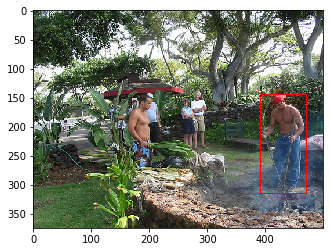

chair
diningtable
chair 155
diningtable 1


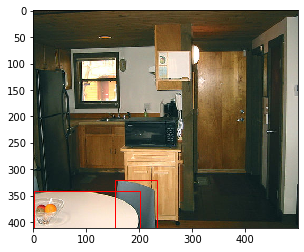

('2008_006482.jpg', ['2011_006135.xml', '2008_006482.xml'])

In [93]:
label=[]
skipped_boxes = 0
skipped_files = 0
saved_boxes = 0
saved_files = 0
for file_index, one_file in enumerate(xml_files[:2]):
    label.append(one_file.split('/')[-1])
    file_name = one_file.split('/')[-1].split('.')[0] + '.jpg'
    bboxes = ProcessXMLAnnotation(one_file)
    assert bboxes is not None, 'No bounding boxes found in ' + one_file
    
    im = np.array(Image.open('../VOC2011/JPEGImages/'+file_name), dtype=np.uint8)
    #print(im)
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)
    
    for bbox in bboxes:

        # Guard against improperly specified boxes.
        if (bbox.xmin_scaled >= bbox.xmax_scaled or
          bbox.ymin_scaled >= bbox.ymax_scaled):
            print(here)
            skipped_boxes += 1
            continue
        print(bbox.label, bbox.xmin)
        found_box = False

        # Create a Rectangle patch
        rect = patches.Rectangle((bbox.xmin,bbox.ymin),bbox.xmax-bbox.xmin,
                                 bbox.ymax-bbox.ymin,
                                 linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.show()
file_name, label